# MCMC with Instrument Only

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from py21cmmc.mcmc import analyse
from py21cmmc.mcmc import CoreLightConeModule
from py21cmmc.mcmc import run_mcmc

from py21cmmc_fg.core import CoreInstrumental, ForegroundsBase
from py21cmmc_fg.likelihood import LikelihoodInstrumental2D

%load_ext autoreload
%autoreload 2

/home/steven/anaconda3/envs/py21cmmc_fg/lib/python3.7/site-packages/powerbox/dft.py:51: UserWarning: You do not have pyFFTW installed. Installing it should give some speed increase.
  warnings.warn("You do not have pyFFTW installed. Installing it should give some speed increase.")


In this tutorial we do MCMC with just the EoR lightcone and an instrument model (i.e. no foregrounds), mostly just to show the basic steps and to make sure that nothing is going wrong.

In [2]:
import py21cmmc
py21cmmc.__version__

'0.1.0'

### EoR Core

In [3]:
core_eor = CoreLightConeModule( # All core modules are prefixed by Core* and end with *Module
    redshift = 7.875,              # Lower redshift of the lightcone
    max_redshift = 8.5,          # Approximate maximum redshift of the lightcone (will be exceeded).
    user_params = dict(       
        HII_DIM = 150,         
        BOX_LEN = 600.0
    ),
    z_step_factor=1.04,          # How large the steps between evaluated redshifts are (log).
    regenerate=False          
) # For other available options, see the docstring.


## MCMC With Simple Gridded Baselines

The core gets setup like this:

In [4]:
core_instr = CoreInstrumental(
    antenna_posfile = 'grid_centres', # use a special grid of *baselines*.
    freq_min = 150.0, # MHz 
    freq_max = 160.0, # MHz
    nfreq = 64, 
    tile_diameter=4.0, 
    max_bl_length=300.0,
    integration_time=1200, 
    Tsys = 0, 
    sky_size = 3, 
    sky_size_coord="sigma", 
    max_tile_n=50,
    n_cells = 300,
    store = {},
)

Now the likelihood:

In [5]:
# Now the likelihood...
likelihood = LikelihoodInstrumental2D(
    n_uv = None, # use underlying n_cells 
    n_ubins=21, 
    umax = 290, 
    frequency_taper=np.blackman, 
    datafile=['data/instrumental_grid_data.npz'],
    simulate = True
)

In [ ]:
model_name = "InstrumentalGridTest"

chain = run_mcmc(
    [core_eor, core_instr], likelihood,
    datadir='data',          # Directory for all outputs
    model_name=model_name,   # Filename of main chain output
    params=dict(             # Parameter dict as described above.
        HII_EFF_FACTOR = [30.0, 10.0, 50.0, 3.0],
        ION_Tvir_MIN = [4.7, 2, 8, 0.1],
    ), 
    walkersRatio=2,         # The number of walkers will be walkersRatio*nparams
    burninIterations=0,      # Number of iterations to save as burnin. Recommended to leave as zero.
    sampleIterations=10,    # Number of iterations to sample, per walker.
    threadCount=2,           # Number of processes to use in MCMC (best as a factor of walkersRatio)
    continue_sampling=False  # Whether to contine sampling from previous run *up to* sampleIterations.
)

Initializing init and perturb boxes for the entire chain...Existing init_boxes found and read in.
Existing z=7.875 perturb_field boxes found and read in.
 done.
Existing z=8.599200000000002 perturb_field boxes found and read in.
Existing z=8.23 perturb_field boxes found and read in.
Existing z=7.875 perturb_field boxes found and read in.
Sampling the data onto baselines
Existing z=8.599200000000002 perturb_field boxes found and read in.
Existing z=8.599200000000002 perturb_field boxes found and read in.
Existing z=8.23 perturb_field boxes found and read in.
Existing z=8.23 perturb_field boxes found and read in.
Existing z=7.875 perturb_field boxes found and read in.
Existing z=7.875 perturb_field boxes found and read in.
Sampling the data onto baselines
Sampling the data onto baselines
LIKELIHOOD IS  -8171.059912200229
LIKELIHOOD IS  -8047.588041785035
Existing z=8.599200000000002 perturb_field boxes found and read in.
Existing z=8.599200000000002 perturb_field boxes found and read in.

Process ForkPoolWorker-1:
Traceback (most recent call last):
  File "/home/steven/anaconda3/envs/py21cmmc_fg/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/steven/anaconda3/envs/py21cmmc_fg/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/steven/anaconda3/envs/py21cmmc_fg/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/steven/anaconda3/envs/py21cmmc_fg/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/home/steven/anaconda3/envs/py21cmmc_fg/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/steven/anaconda3/envs/py21cmmc_fg/lib/python3.7/multiprocessing/connection.py", line 411, in _recv_bytes
    return self._recv(size)
  File "/home/steven/anaconda3/envs/py21cmmc_fg/lib/python3.7/multiprocessing/connect

Existing z=8.599200000000002 perturb_field boxes found and read in.


Process ForkPoolWorker-4:
Traceback (most recent call last):
  File "/home/steven/anaconda3/envs/py21cmmc_fg/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/steven/anaconda3/envs/py21cmmc_fg/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/steven/anaconda3/envs/py21cmmc_fg/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/steven/anaconda3/envs/py21cmmc_fg/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
_pickle.UnpicklingError: invalid load key, 'm'.


Existing z=8.23 perturb_field boxes found and read in.
Existing z=7.875 perturb_field boxes found and read in.
Sampling the data onto baselines
LIKELIHOOD IS  -8548.592848771452


## Conceptual Checks

In this section, we check a few plots of various quantities to make sure we understand "what's really going on".

Show the baseline positions (remember we are putting them at a regular grid)

Text(0, 0.5, 'y (m)')

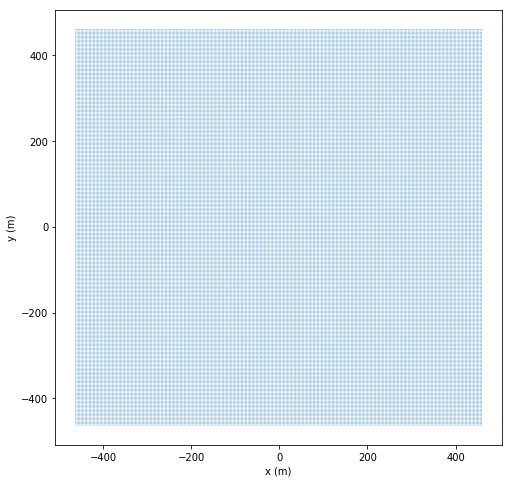

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(likelihood.baselines[:,0], likelihood.baselines[:,1], s=2, marker='.', edgecolor='none')
plt.xlabel("x (m)")
plt.ylabel("y (m)")

Show the underlying simulation brightness temp:

Existing z=8.599200000000002 perturb_field boxes found and read in.
Existing z=8.23 perturb_field boxes found and read in.
Existing z=7.875 perturb_field boxes found and read in.
Sampling the data onto baselines


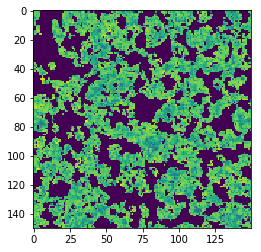

In [8]:
plt.imshow(core_instr.default_ctx.get("lightcone").brightness_temp[:,:, 0])

In [9]:
core_instr.sim_frequencies

array([1.60000000e+08, 1.59754659e+08, 1.59509506e+08, 1.59264544e+08,
       1.59019771e+08, 1.58775188e+08, 1.58530794e+08, 1.58286590e+08,
       1.58042576e+08, 1.57798752e+08, 1.57555115e+08, 1.57311671e+08,
       1.57068414e+08, 1.56825346e+08, 1.56582469e+08, 1.56339781e+08,
       1.56097282e+08, 1.55854974e+08, 1.55612853e+08, 1.55370923e+08,
       1.55129182e+08, 1.54887631e+08, 1.54646268e+08, 1.54405095e+08,
       1.54164114e+08, 1.53923319e+08, 1.53682715e+08, 1.53442299e+08,
       1.53202072e+08, 1.52962035e+08, 1.52722188e+08, 1.52482530e+08,
       1.52243062e+08, 1.52003783e+08, 1.51764692e+08, 1.51525792e+08,
       1.51287079e+08, 1.51048557e+08, 1.50810224e+08, 1.50572080e+08,
       1.50334124e+08, 1.50096360e+08, 1.49858782e+08, 1.49621396e+08,
       1.49384197e+08, 1.49147190e+08])

The sky size (in lm co-ordinates) after tiling/coarsening:

In [10]:
core_instr.sky_size

<Quantity 0.62956416>

The simulated sky after stitching and coarsening (note this code is just copied from the call function, and may change between versions):

Existing z=8.599200000000002 perturb_field boxes found and read in.
Existing z=8.23 perturb_field boxes found and read in.
Existing z=7.875 perturb_field boxes found and read in.
Sampling the data onto baselines


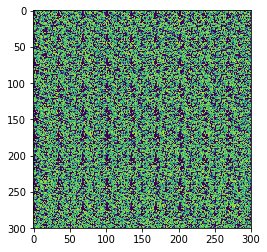

In [11]:
lightcone = core_instr.default_ctx.get("lightcone") #Doing this actually does all of the below, 
                                                    # but the below is not saved to the context...

boxsize = core_instr._base_module.user_params.BOX_LEN
cosmo = core_instr._base_module.cosmo_params.cosmo
EoR_size = ForegroundsBase.get_sky_size(boxsize, core_instr.redshifts, cosmo)

# TODO: stitch stuff together and then coarsen the grid
new_sky = core_instr.stitch_boxes(lightcone.brightness_temp, EoR_size)
if core_instr.n_cells > 0:
    new_sky = core_instr.coarsen_sky(new_sky, n2=core_instr.n_cells)[0]


We can try to look at a single (coarsened) simulation:

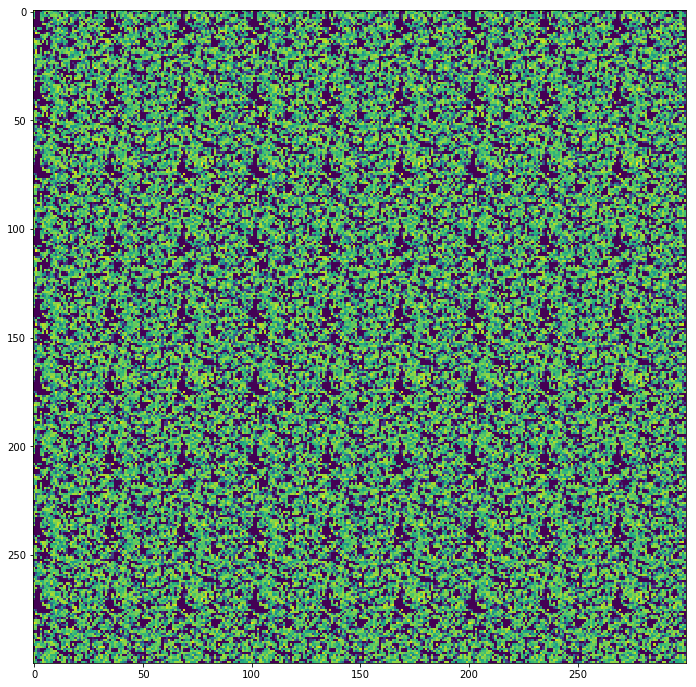

In [12]:
plt.figure(figsize=(12,12))
plt.imshow(new_sky[:,:,0])

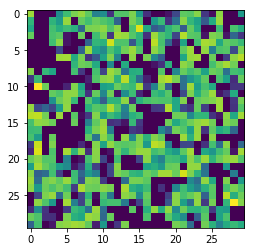

In [14]:
plt.imshow(new_sky[:30,:30,0])

And a gridded power spectrum

In [15]:
power = likelihood.p_data

In [31]:
power

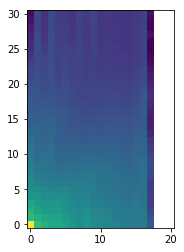

In [16]:
plt.imshow(np.log10(likelihood.p_data.T), origin='lower')

## Analysis

### Accessing chain data

Access the samples object within the chain (see the intro for more details):

In [7]:
samples = chain.samples

NameError: name 'chain' is not defined

### Trace Plot

Often, for diagnostic purposes, the most useful plot to start with is the trace plot. This enables quick diagnosis of burnin time and walkers that haven't converged. The function in ``py21cmmc`` by default plots the log probability along with the various parameters that were fit. It also supports setting a starting iteration, and a thinning amount. 

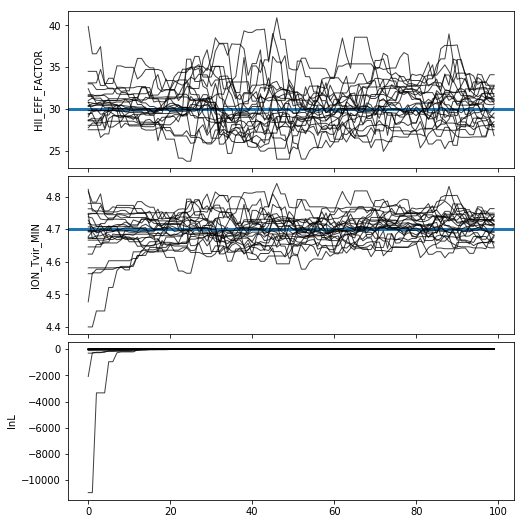

In [6]:
analyse.trace_plot(samples, include_lnl=True, start_iter=0, thin=1, colored=False, show_guess=True);

### Corner Plot

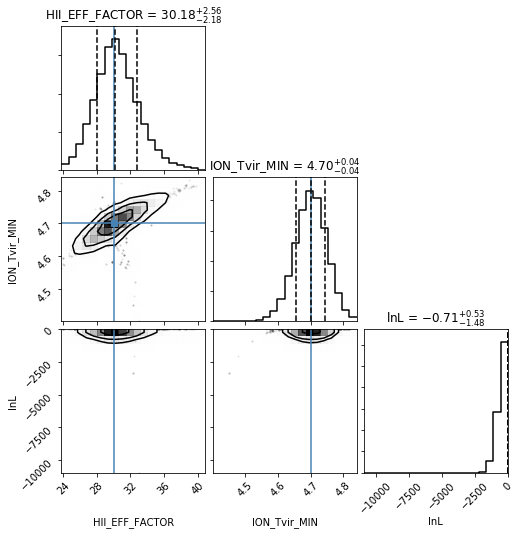

In [7]:
analyse.corner_plot(samples);

### Model Comparison Plot

Extract all blob data from the samples:

In [8]:
blobs = samples.get_blobs()

Read in the data:

In [12]:
delta_data = [d['delta'] for d in likelihood.data]
k_data = [d['k'] for d in likelihood.data]

Now, let's define a function which will plot our model comparison:

In [23]:
def model_compare_plot(samples, k_data, delta_data, thin=1, start_iter=0):
    chain = samples.get_chain(thin=thin, discard=start_iter, flat=True)
    blobs = samples.get_blobs(thin=thin, discard=start_iter, flat=True)
    
    ks = [blobs[name] for name in samples.blob_names if name.startswith("k")]
    models = [blobs[name] for name in samples.blob_names if name.startswith("delta")]
    
    fig, ax = plt.subplots(1, len(ks), sharex=True, sharey=True, figsize=(5*len(ks), 4.5), 
                          subplot_kw={"xscale":'log', "yscale":'log'}, gridspec_kw={"hspace":0.05, 'wspace':0.05},
                          squeeze=False)

    for i,(k,model, kd, data) in enumerate(zip(ks,models, k_data, delta_data)):
        label="models"

        for pp in model:
            ax[0,i].plot(k[0], pp, color='k', alpha=0.2, label=label, zorder=1)
            if label:
                label=None

        mean = np.mean(model, axis=0)
        std = np.std(model, axis=0)
        md = np.median(model, axis=0)

        ax[0,i].fill_between(k[0], mean - std, mean+std, color="C0", alpha=0.6)
        ax[0,i].plot(k[0], md, color="C0", label="median model")

        ax[0,i].errorbar(kd, data, yerr = (0.15*data), color="C1", 
                     label="data", ls="None", markersize=5, marker='o')

        ax[0,i].set_xlabel("$k$ [Mpc$^{-3}$]", fontsize=15)
        ax[0,i].text(0.5, 0.86, "Chunk %s"%i, transform=ax[0,i].transAxes, fontsize=15, fontweight='bold')

    ax[0,0].legend(fontsize=12)
    #plt.ylim((3.1e2, 3.5e3))


    ax[0,0].set_ylabel("$k^3 P$", fontsize=15)

#plt.savefig(join(direc, modelname+"_power_spectrum_plot.pdf"))

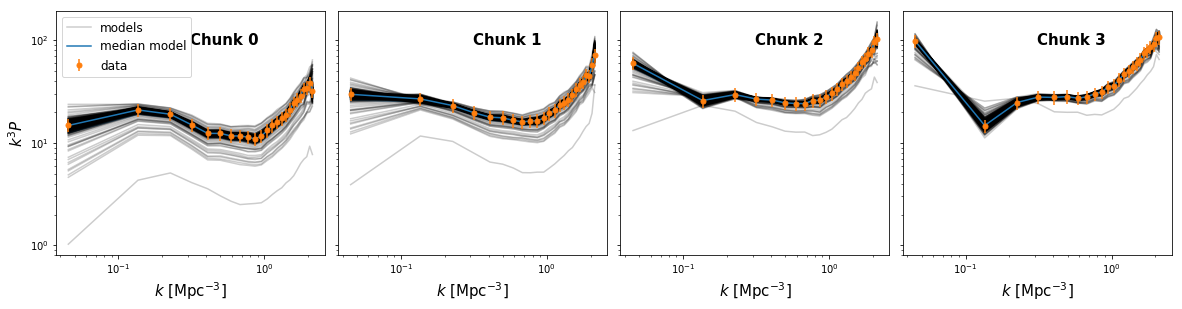

In [24]:
model_compare_plot(samples, k_data, delta_data, thin=5)